In [1]:
import numpy as np 
import pandas as pd  

In [2]:
data = pd.read_csv("car_evaluation.csv")

In [3]:
data.head() 

,buying,maint,doors,persons,lug_boot,safety,outcome
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [5]:
data.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
outcome     0
dtype: int64

In [6]:
print(data['outcome'].unique())
 

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

In [7]:
data.describe() 

,doors,persons
count,1728.000000,1728.000000
mean,3.500000,3.989583
std,1.118358,1.627039
min,2.000000,2.000000
25%,2.750000,2.000000
50%,3.500000,4.000000
75%,4.250000,6.000000
max,5.000000,6.000000


In [8]:
data.outcome.value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: outcome, dtype: int64

In [9]:
import seaborn as sns 

### COnfusion matrix 

<AxesSubplot:>

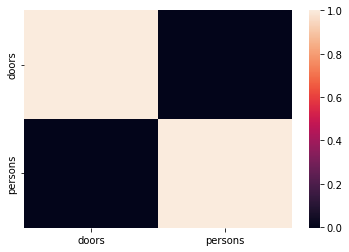

In [11]:
sns.heatmap(data.corr())

<AxesSubplot:ylabel='outcome'>

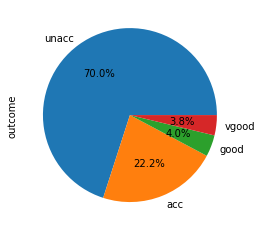

In [13]:
data.outcome.value_counts().plot(kind ="pie", autopct ="%1.1f%%")

# Label Encoding 

In [14]:
from sklearn.preprocessing import LabelEncoder 

le = LabelEncoder() 

In [15]:
 columns = ["buying" , "maint" , "lug_boot" , "safety"] 

In [17]:
data[columns] = data[columns].apply(le.fit_transform)

In [18]:
data.head() 

,buying,maint,doors,persons,lug_boot,safety,outcome
0,3,3,2,2,2,1,unacc
1,3,3,2,2,2,2,unacc
2,3,3,2,2,2,0,unacc
3,3,3,2,2,1,1,unacc
4,3,3,2,2,1,2,unacc


### Splitting data 

In [19]:
x = data.drop(columns = "outcome")
y = data["outcome"]

In [20]:
x.head() 

,buying,maint,doors,persons,lug_boot,safety
0,3,3,2,2,2,1
1,3,3,2,2,2,2
2,3,3,2,2,2,0
3,3,3,2,2,1,1
4,3,3,2,2,1,2


In [21]:
y.head()

0    unacc
1    unacc
2    unacc
3    unacc
4    unacc
Name: outcome, dtype: object

### Splitting data as train and test data 

In [22]:
from sklearn.model_selection import train_test_split 

In [23]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2 , random_state = 47 )

In [24]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((1382, 6), (346, 6), (1382,), (346,))

### Model building 

In [29]:
from sklearn.neighbors  import KNeighborsClassifier
knn = KNeighborsClassifier() 
knn.fit(x_train , y_train)

KNeighborsClassifier()

In [30]:
y_pred = knn.predict(x_test)

In [33]:
y_pred[:10]

array(['unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc'], dtype=object)

In [34]:
y_test[:10]

189     unacc
364     unacc
973     unacc
351     unacc
781       acc
1570    unacc
1250    unacc
35      unacc
146     unacc
490     unacc
Name: outcome, dtype: object

In [36]:
knn.predict([[3,3,2,2,2,1]])

C:\Users\Mohith\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['unacc'], dtype=object)

In [38]:
from sklearn.metrics import accuracy_score , classification_report 

In [39]:
accuracy_score(y_pred, y_test)

0.9219653179190751

In [41]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

         acc       0.89      0.79      0.84        84
        good       0.29      0.57      0.38         7
       unacc       0.97      0.98      0.98       245
       vgood       0.82      0.90      0.86        10

    accuracy                           0.92       346
   macro avg       0.74      0.81      0.76       346
weighted avg       0.93      0.92      0.93       346



In [42]:
pd.crosstab(y_test, y_pred)

col_0,acc,good,unacc,vgood
outcome,,,,
acc,66,3,5,0
good,9,4,0,1
unacc,7,0,240,0
vgood,2,0,0,9


# Handle Imbalanced  data 


In [44]:
from imblearn.over_sampling import SMOTE

In [45]:
smote = SMOTE() 

In [46]:
x_train_smote , y_train_smote = smote.fit_resample(x_train , y_train) 

In [47]:
y_train.value_counts()

unacc    963
acc      310
good      55
vgood     54
Name: outcome, dtype: int64

In [48]:
y_train_smote.value_counts()

acc      963
unacc    963
vgood    963
good     963
Name: outcome, dtype: int64

# Model BUilding on balanced data set 

In [49]:
knn_smote = KNeighborsClassifier()
knn_smote.fit(x_train_smote , y_train_smote)

KNeighborsClassifier()

In [51]:
y_pred1 = knn_smote.predict(x_test)

In [52]:
accuracy_score(y_pred1 , y_test)

0.8728323699421965

In [55]:
print(classification_report(y_test , y_pred1))

              precision    recall  f1-score   support

         acc       0.67      0.89      0.76        74
        good       0.58      0.79      0.67        14
       unacc       0.99      0.88      0.93       247
       vgood       0.89      0.73      0.80        11

    accuracy                           0.87       346
   macro avg       0.78      0.82      0.79       346
weighted avg       0.90      0.87      0.88       346



In [56]:
pd.crosstab(y_test, y_pred1)

col_0,acc,good,unacc,vgood
outcome,,,,
acc,66,5,2,1
good,3,11,0,0
unacc,28,2,217,0
vgood,2,1,0,8
